In [3]:
install.packages("ergm", dependencies = TRUE)
install.packages("network")
install.packages("parallel")
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ergm.count’, ‘Rglpk’


Warning message in install.packages("ergm", dependencies = TRUE):
“installation of package ‘Rglpk’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘parallel’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(ergm)
library(network)
library(parallel)
library(ggplot2)
library(gridExtra)

In [5]:
# Had to use multithreaded approach to run a reduced ERGM model.
num_cores <- detectCores()

# Method to plot coefficients from ERGM model.
plot_model_coefs <- function(model, title) {
  coefs <- summary(model)$coefficients
  df <- data.frame(term = rownames(coefs), estimate = coefs[, 1], se = coefs[, 2])
  df$ci_lower <- df$estimate - 1.96 * df$se
  df$ci_upper <- df$estimate + 1.96 * df$se

  ggplot(df, aes(x = term, y = estimate)) +
    geom_point() +
    geom_errorbar(aes(ymin = ci_lower, ymax = ci_upper), width = 0.2) +
    coord_flip() +
    labs(title = title, y = "Estimate", x = "") +
    theme_minimal()
}


Starting maximum pseudolikelihood estimation (MPLE):

Obtaining the responsible dyads.

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = caltech_g ~ edges + nodematch("year") + nodematch("residence") + 
    nodematch("major") + nodematch("high_school"), control = control.ergm(parallel = num_cores, 
    parallel.type = "PSOCK", MCMLE.maxit = 100))

Maximum Likelihood Results:

                      Estimate Std. Error MCMC % z value Pr(>|z|)    
edges                 -3.59328    0.01254      0 -286.47   <1e-04 ***
nodematch.year         1.30579    0.01746      0   74.81   <1e-04 ***
nodematch.residence    1.80352    0.01734      0  104.03   <1e-04 ***
nodematch.major        0.37469    0.02797      0   13.39   <1e-04 ***
nodematch.high_school -2.07340    0.07712      0  -26.88   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 409367  on 295296  degrees of freedom
 Residual Deviance: 112140  on 295291  degrees of freedom
 
AIC: 112150  BIC: 112203  (Smaller is better. MC Std. Err. = 0)

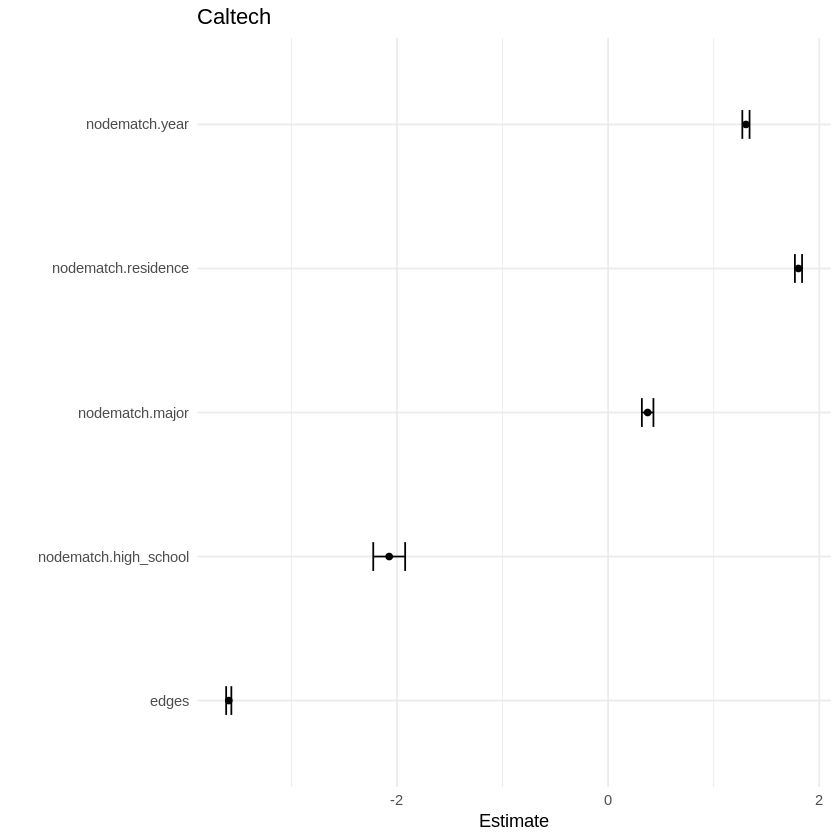

In [8]:
## -- Load Caltech's graph --

# Load adjacency matrix (skip first row with node IDs)
caltech_adj <- as.matrix(read.csv("Caltech36_adj.csv", header = FALSE, skip = 1))

# Load node attributes.
caltech_node_info <- read.csv("Caltech36_local_info.csv")

# Create undirected network.
caltech_g <- network(caltech_adj, directed = FALSE)

# Add node-level attributes.
set.vertex.attribute(caltech_g, "year", caltech_node_info$year)
set.vertex.attribute(caltech_g, "residence", caltech_node_info$dorm)
set.vertex.attribute(caltech_g, "major", caltech_node_info$major)
set.vertex.attribute(caltech_g, "high_school", caltech_node_info$high_school)

# Run ERGM model with modelling assumptions about attributes.
caltech_model <- ergm(
  caltech_g ~ edges + nodematch("year") + nodematch("residence") +
    nodematch("major") + nodematch("high_school"),
  control = control.ergm(
    parallel = num_cores,
    parallel.type = "PSOCK",
    MCMLE.maxit = 100
  )
)

# Print summary about the model
summary(caltech_model)

# Plot coefficients.
caltech_p <- plot_model_coefs(caltech_model, "Caltech")

grid.arrange(caltech_p, nrow=1)

Starting maximum pseudolikelihood estimation (MPLE):

Obtaining the responsible dyads.

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = dartmouth_g ~ edges + nodematch("year") + nodematch("residence") + 
    nodematch("major") + nodematch("high_school"), control = control.ergm(parallel = num_cores, 
    parallel.type = "PSOCK", MCMLE.maxit = 100))

Maximum Likelihood Results:

                       Estimate Std. Error MCMC %  z value Pr(>|z|)    
edges                 -4.498292   0.002167      0 -2076.28   <1e-04 ***
nodematch.year         0.102176   0.005597      0    18.26   <1e-04 ***
nodematch.residence   -0.191384   0.005365      0   -35.67   <1e-04 ***
nodematch.major       -0.149691   0.007036      0   -21.28   <1e-04 ***
nodematch.high_school -0.581930   0.007818      0   -74.44   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 40325423  on 29088644  degrees of freedom
 Residual Deviance:  3298500  on 29088639  degrees of freedom
 
AIC: 3298510  BIC: 3298586  (Smaller is better. MC Std. Err. = 0)

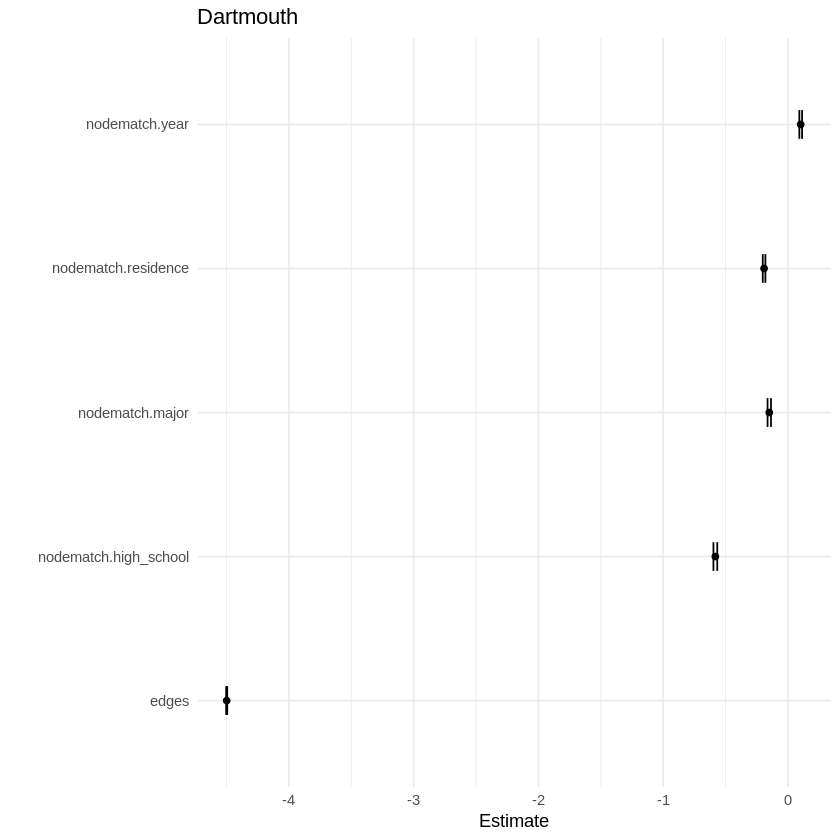

In [9]:
## -- Load Dartmouth's graph --

# Load adjacency matrix (skip first row with node IDs)
dartmouth_adj <- as.matrix(read.csv("Dartmouth6_adj.csv", header = FALSE, skip = 1))

# Load node attributes.
dartmouth_node_info <- read.csv("Dartmouth6_local_info.csv")

# Create undirected network.
dartmouth_g <- network(dartmouth_adj, directed = FALSE)

# Add node-level attributes.
set.vertex.attribute(dartmouth_g, "year", dartmouth_node_info$year)
set.vertex.attribute(dartmouth_g, "residence", dartmouth_node_info$dorm)
set.vertex.attribute(dartmouth_g, "major", dartmouth_node_info$major)
set.vertex.attribute(dartmouth_g, "high_school", dartmouth_node_info$high_school)

# Run ERGM model with modelling assumptions about attributes.
dartmouth_model <- ergm(
  dartmouth_g ~ edges + nodematch("year") + nodematch("residence") +
    nodematch("major") + nodematch("high_school"),
  control = control.ergm(
    parallel = num_cores,
    parallel.type = "PSOCK",
    MCMLE.maxit = 100
  )
)

# Print summary about the model
summary(dartmouth_model)

# Plot coefficients.
dartmouth_p <- plot_model_coefs(dartmouth_model, "Dartmouth")

grid.arrange(dartmouth_p, nrow=1)

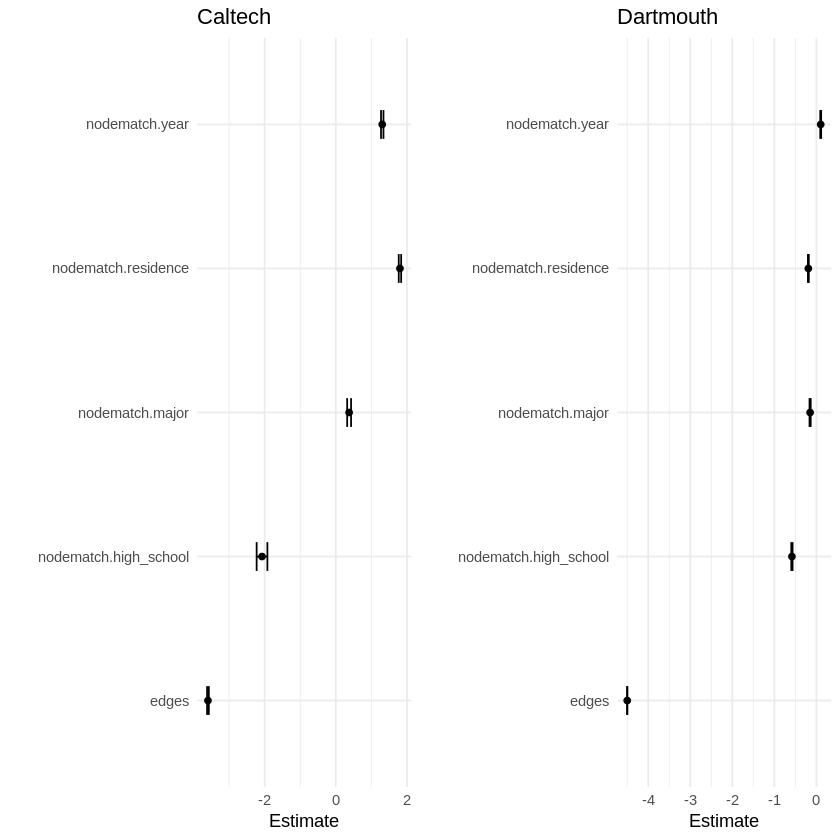

In [10]:
# Plot side-by-side
grid.arrange(caltech_p, dartmouth_p, nrow = 1)

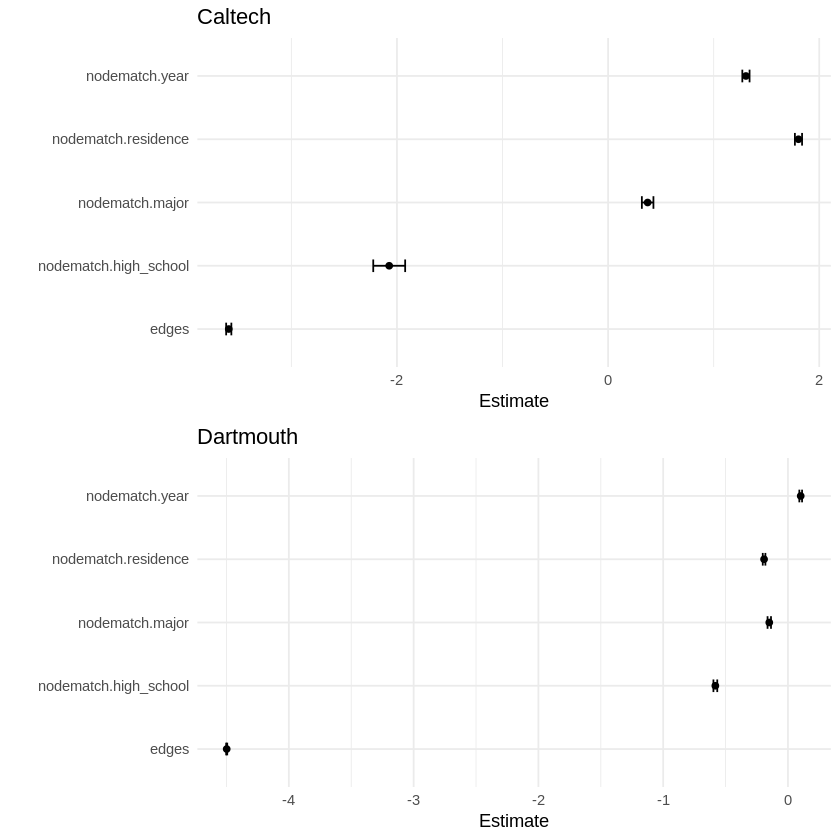

In [12]:
# Plot side-by-side
grid.arrange(caltech_p, dartmouth_p)

Starting maximum pseudolikelihood estimation (MPLE):

Obtaining the responsible dyads.

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = cornell_g ~ edges + nodematch("year") + nodematch("residence") + 
    nodematch("major") + nodematch("high_school"), control = control.ergm(parallel = num_cores, 
    parallel.type = "PSOCK", MCMLE.maxit = 100))

Maximum Likelihood Results:

                       Estimate Std. Error MCMC %   z value Pr(>|z|)    
edges                 -5.342019   0.003227      0 -1655.514   <1e-04 ***
nodematch.year         0.089152   0.007943      0    11.224   <1e-04 ***
nodematch.residence   -0.228957   0.007902      0   -28.974   <1e-04 ***
nodematch.major       -0.040502   0.013827      0    -2.929   0.0034 ** 
nodematch.high_school -0.423392   0.016145      0   -26.224   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 39940011  on 28810628  degrees of freedom
 Residual Deviance:  1677430  on 28810623  degrees of freedom
 
AIC: 1677440  BIC: 1677516  (Smaller is better. MC Std. Err. = 0)

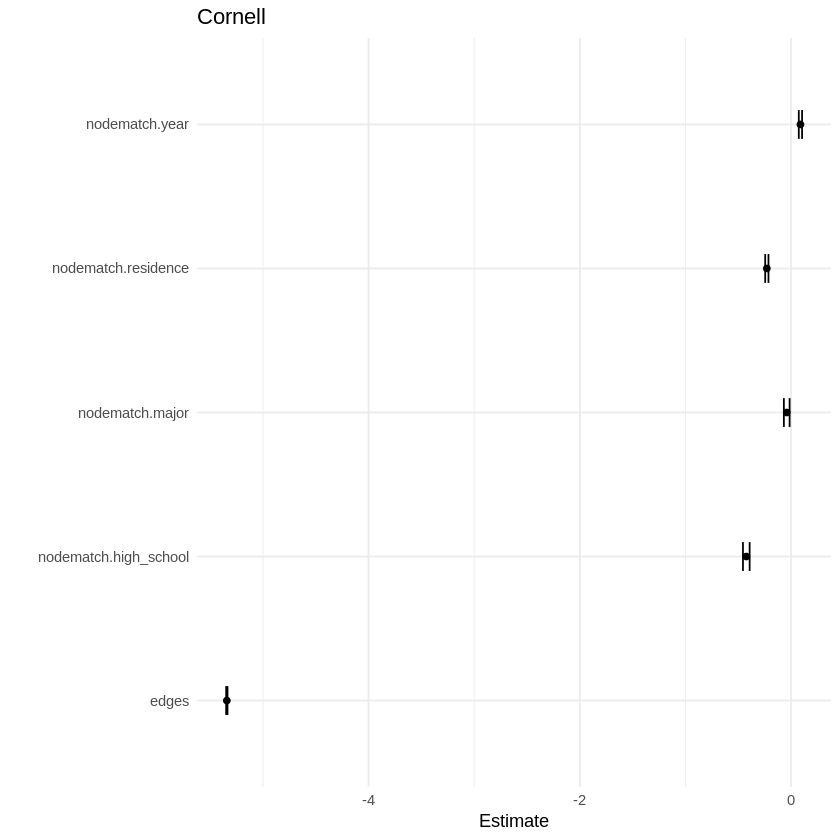

In [13]:
## -- Load Cornell's graph --
## Ran into RAM limitations for loading the adjacency matrix on my MacBook.

# Load adjacency matrix (skip first row with node IDs)
cornell_adj <- as.matrix(read.csv("Cornell5_adj.csv", header = FALSE, skip = 1))

# Load node attributes.
cornell_node_info <- read.csv("Cornell5_local_info.csv")

# Create undirected network.
cornell_g <- network(cornell_adj, directed = FALSE)

# Add node-level attributes.
set.vertex.attribute(cornell_g, "year", cornell_node_info$year)
set.vertex.attribute(cornell_g, "residence", cornell_node_info$dorm)
set.vertex.attribute(cornell_g, "major", cornell_node_info$major)
set.vertex.attribute(cornell_g, "high_school", cornell_node_info$high_school)

# Run ERGM model with modelling assumptions about attributes.
cornell_model <- ergm(
  cornell_g ~ edges + nodematch("year") + nodematch("residence") +
    nodematch("major") + nodematch("high_school"),
  control = control.ergm(
    parallel = num_cores,
    parallel.type = "PSOCK",
    MCMLE.maxit = 100
  )
)

# Print summary about the model
summary(cornell_model)

# Plot coefficients.
cornell_p <- plot_model_coefs(cornell_model, "Cornell")

grid.arrange(cornell_p, nrow=1)

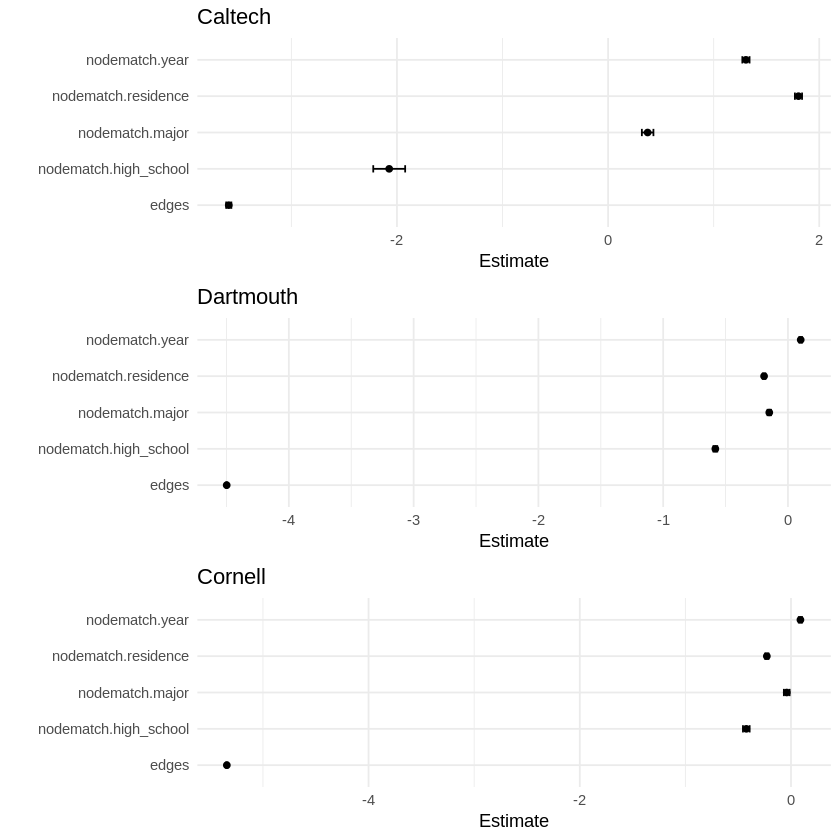

In [14]:
# Plot side-by-side
grid.arrange(caltech_p, dartmouth_p, cornell_p)